## Author - Azab Ammar Ahmad
### Data Science & Business Analytics intern at The Sparks Foundation #GRIPSEPT22

### Task 1 - Prediction using Supervised ML

This is a simple linear regression task that it involves just 2 variables to **predict the percentage of a student based on the no. of study hours.**



## Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

## Load Data

In [ ]:
df = pd.read_csv('http://bit.ly/w-data')
print("Data is loaded successfully")
df.head()

Data is loaded successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Explore data 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


As we can see the output is a summary includes list of all columns with their data types and the number of non-null values in each column.

We have two columns:

*   Hours with 25 float64 value, no null value
*   Scores with 25 int64 value, no null value




we also have the value of rangeindex provided for the index axis.


## Data Visualization
To understand data and check if there is any relationship between the data points

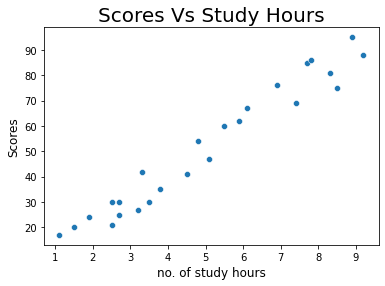

In [ ]:
sns.scatterplot(y= df.Scores, x= df.Hours)
plt.title('Scores Vs Study Hours',size=20)
plt.ylabel('Scores', size=12)
plt.xlabel('no. of study hours', size=12)
plt.show()

We notice there is a linear correlation between the score and the number of study hours

### Plotting the regression line


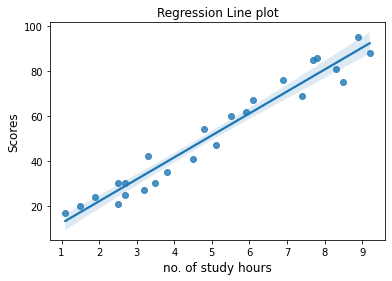

In [ ]:
sns.regplot(x= df.Hours, y= df.Scores)
# Plotting for the test data
plt.title('Regression Line plot')
plt.ylabel('Scores', size=12)
plt.xlabel('no. of study hours', size=12)
plt.show()

this confirm the previous notice, that the score and no. of study hours are positively correlated

### Preparing the data for regression

Data will be divided into input(features) which is here the #of study hours and output(target) which is the score

In [ ]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

### Split data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0 ) 

### Train the regressor

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Make Predictions on testing data


In [ ]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


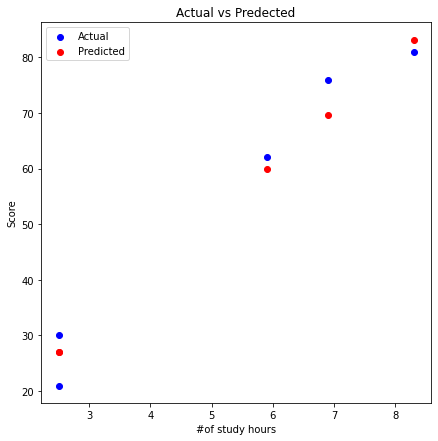

In [ ]:
# Visually comparing Actual vs Predicted scores
plt.figure(figsize=(7,7))
plt.scatter(X_test, y_test, color = 'blue')
plt.scatter(X_test, y_pred, color = 'red')
plt.title('Actual vs Predected')
plt.xlabel('#of study hours')
plt.ylabel('Score')
plt.legend(['Actual','Predicted'], loc = "best")
plt.show()

###  Testing with own data


In [ ]:
# Predicted score if a student studies for 9.25 hrs/ day?
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


### Evaluating the model


In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244
